# Operator Learning with DeepXDE

Compiling model...
'compile' took 0.000918 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.38e+00]    [1.35e+00]    [2.16e+00]    
1000      [9.33e-05]    [1.79e-04]    [4.75e-02]    
2000      [3.59e-05]    [8.56e-05]    [3.24e-02]    
3000      [1.98e-05]    [5.38e-05]    [2.61e-02]    
4000      [1.38e-05]    [4.04e-05]    [2.30e-02]    
5000      [1.24e-05]    [3.54e-05]    [2.11e-02]    
6000      [9.31e-06]    [2.72e-05]    [1.88e-02]    
7000      [7.76e-06]    [2.24e-05]    [1.71e-02]    
8000      [6.34e-06]    [1.77e-05]    [1.55e-02]    
9000      [5.75e-06]    [1.49e-05]    [1.44e-02]    
10000     [4.87e-06]    [1.20e-05]    [1.33e-02]    

Best model at step 10000:
  train loss: 4.87e-06
  test loss: 1.20e-05
  test metric: [1.33e-02]

'train' took 17.843056 s



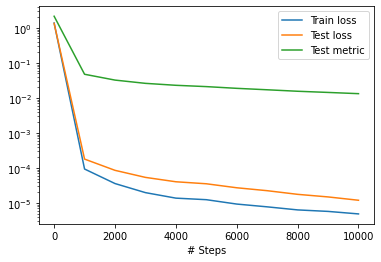

In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
d = np.load("dataset/antiderivative_aligned_train.npz", allow_pickle=True)
X_train = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_train = d["y"].astype(np.float32)
d = np.load("dataset/antiderivative_aligned_test.npz", allow_pickle=True)
X_test = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_test = d["y"].astype(np.float32)

data = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
)

# Choose a network
m = 100
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

# Define a Model
model = dde.Model(data, net)

# Compile and Train
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.show()